In [1]:
# project: p10
# submitter: hkim876
# partner: ychung66

In [2]:
# To-dos

# 1.download function

# 2.https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json 
#and store it in countries.json. , download test, expected

# 3.create a Dataframe countries from this file

# 4.display country.head()

# 5. download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

# 6. download BeautifulSoup

# 7. Lintering

In [3]:
import pandas as pd
import requests, json, matplotlib, os, math
from bs4 import BeautifulSoup
from pandas import Series, DataFrame
%matplotlib inline

In [4]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    else:
        r=requests.get(url)
        r.raise_for_status()
        f = open(filename, "w", encoding="utf-8")
        f.write(r.text)
        f.close()
    return (str(filename) + " created!")

In [5]:
download('countries.json', 'https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json')

'countries.json already exists!'

In [6]:
countries = pd.read_json('countries.json')
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [7]:
#Q1: How many countries do we have in our dataset?
len(countries)

174

In [8]:
#Q2: what is the total area across all the countries in our dataset?
countries["area"].sum()

127170843

In [9]:
download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

'capitals.html created!'

In [10]:
f = open('capitals.html')
text = f.read()
f.close()
soup = BeautifulSoup(text, 'html.parser')
capitals = []
country_name = list(countries["country"])
for table in soup.find_all('tr'):
    cells = table.find_all('td')
    if cells[0].get_text() not in country_name:
        continue
    dic = {}
    dic["country"] = cells[0].get_text()
    dic["capital"] = cells[1].get_text()
    dic["latitude"] = cells[2].get_text()
    dic["longitude"] = cells[3].get_text()
    capitals.append(dic)
f = open("capitals.json", "w")
json.dump(capitals, f)
f.close()

In [11]:
capitals = pd.read_json('capitals.json')
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [12]:
#Q3: What are the country names in capitals.json?
list(capitals["country"])


['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [13]:
#Q4: What is the capital of Cuba?
country= capitals["country"]
capital = capitals["capital"]  
i = 0 
for j in range(len(country)):
    if country[j] == 'Cuba':
        i = j
capital[i]

'Havana'

In [14]:
#Q5: Which country's capital is Tbilisi?
i = 0
for j in range(len(capital)):
    if capitals["capital"][j] == 'Tbilisi':
        i = j 
country[i]

'Georgia'

In [15]:
#Q6: Which 7 countries have the southern-most capitals?
southern_most_c = capitals.sort_values(by=['latitude'])
country_list = []
for i in southern_most_c['country']:
    country_list.append(i)
country_list[:7]

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [16]:
#Q7: Which 5 countries have the northern-most capitals?
#Copied code from https://www.geeksforgeeks.org/python-reversing-list/
def Reverse(lst): 
    lst.reverse() 
    return lst 
Reverse(country_list[-5:])

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [17]:
#Q8: For birth-rate and death-rate, what are various summary statistics (e.g., mean, max, standard deviation, etc)?
DataFrame({'birth-rate':countries['birth-rate'], 'death-rate':countries['death-rate']}).describe()

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [18]:
#Q9: For columns literacy and phones, what are various summary statistics?
# convert the column of strings to a column of floats.
# learn how to use the astype and replace Pandas functions.

literacy = pd.Series(countries['literacy']).replace(',', '.', regex = True)
phones = pd.Series(countries['phones']).replace(',', '.', regex = True)
df_2 = DataFrame({'literacy':literacy.astype('float'), 
                             'phones':phones.astype('float')})
countries['phones'] = phones.astype('float')
countries['literacy'] = literacy.astype('float')
df_2.describe()

,literacy,phones
count,174.000000,174.000000
mean,82.362069,215.770690
std,20.003166,218.713811
min,17.600000,1.300000
25%,70.100000,32.000000
50%,92.100000,140.350000
75%,98.000000,331.750000
max,100.000000,1035.600000


In [19]:
#Q10: What is the largest land-locked country in Europe?
#A "land-locked" country is one that has zero coastline. Largest is in terms of area.  

#countries_by_area = countries.sort_values(by = 'area', ascending = False)
#list(countries_by_area[countries['coastline']==0][countries['continent'] == 'Europe']['country'])[0]

ll = countries[countries.coastline == 0]
next(iter(ll[ll.continent == "Europe"].sort_values(by="area", ascending=False).country))


'Belarus'

In [20]:
#Q11: What is the largest land-locked country in Asia?

#countries_by_area = countries.sort_values(by = 'area', ascending = False)
#list(countries_by_area[countries['coastline']==0][countries['continent'] == 'Asia']['country'])[0]

ll = countries[countries.coastline == 0]
next(iter(ll[ll.continent == "Asia"].sort_values(by="area", ascending=False).country))

'Kazakhstan'

In [21]:
#Q12: What is the most populous land-locked country in Asia?

#pop = countries.sort_values(by = 'population', ascending = False)
#list(pop[countries['continent'] == 'Asia'][countries['coastline'] == 0]['country'])[0]

next(iter(ll[ll.continent == 'Asia'].sort_values(by = 'population', ascending = False).country))

'Afghanistan'

In [22]:
import numpy as np
def distance(lat1, lon1, lat2, lon2): 
    R = 3956
    dlon = math.radians(lon2 - lon1)
    dlat = math.radians(lat2 - lat1)
    a = (math.sin(dlat/2))**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * (math.sin(dlon/2))**2
    c = 2 * np.arcsin(min(1, math.sqrt(a)))
    d = R * c
    return d

In [23]:
#Q13: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
#1.433899492072933
distance(43.070231,-89.411893, 43.074645,-89.384113)

1.4338994920734274

In [24]:
#Q14: What is the distance between France and Japan?
#6032.330932363535

France = capitals[capitals.country == 'France']
France_lat = float(France['latitude'])
France_lon = float(France['longitude'])

Japan = capitals[capitals.country == 'Japan']
Japan_lat = float(Japan['latitude'])
Japan_lon = float(Japan['longitude'])


distance(France_lat, France_lon, Japan_lat, Japan_lon)

6032.330932363535

In [25]:
#Q15: What are the distances between Guam, New Zealand, and Australia?

countries_list = ['Guam','New Zealand','Australia']
df = pd.DataFrame(index = countries_list, columns = countries_list, dtype='float64')

def distance_2(country_1, country_2):
    lat_1 = capitals[capitals.country == country_1]['latitude'].iloc[0]
    lon_1 = capitals[capitals.country == country_1]['longitude'].iloc[0]
    lat_2 = capitals[capitals.country == country_2]['latitude'].iloc[0]
    lon_2 = capitals[capitals.country == country_2]['longitude'].iloc[0]
    return distance(lat_1,lon_1, lat_2,lon_2)

def dis_between_countries(dataframe, lst):
    for col1 in lst:
        for col2 in lst:
            if col1 == col2:
                continue
            else:
                dataframe[col1][col2] = distance_2(col1, col2)
    return dataframe
            
dis_between_countries(df,countries_list )


,Guam,New Zealand,Australia
Guam,NaN,4239.314912,3377.103870
New Zealand,4239.314912,NaN,1445.147895
Australia,3377.103870,1445.147895,NaN


In [26]:
#Q16: What is the distance between every pair of countries in the Australian continent?

Australian = countries[countries['continent'] == 'Australia']['country']
Australian_list = []

for country in Australian:
    Australian_list.append(country)
    
df_Aus = pd.DataFrame(index = Australian_list, columns = Australian_list, dtype='float64')
    
dis_between_countries(df_Aus, Australian_list)

,Marshall Islands,French Polynesia,New Zealand,Vanuatu,Palau,Papua New Guinea,Guam,Samoa,New Caledonia,Australia,Fiji,Tonga
Marshall Islands,NaN,3159.856137,3348.725378,1727.328621,2516.301728,2019.144119,1861.584428,1849.150692,2054.905160,3263.901948,1806.972599,2151.129410
French Polynesia,3159.856137,NaN,2668.807328,2765.339382,5447.018761,4265.757856,4961.131713,1496.953816,2864.497308,3920.570216,2102.135722,1686.539411
New Zealand,3348.725378,2668.807328,NaN,1671.641167,4218.188412,2767.607095,4239.314912,2062.548020,1400.483623,1445.147895,1613.916992,1510.219450
Vanuatu,1727.328621,2765.339382,1671.641167,NaN,2882.041892,1527.495923,2687.395771,1349.904435,335.602971,1687.810709,663.967196,1098.016273
Palau,2516.301728,5447.018761,4218.188412,2882.041892,NaN,1453.306058,800.243081,3956.305436,2974.892838,3099.023227,3468.037102,3931.843110
Papua New Guinea,2019.144119,4265.757856,2767.607095,1527.495923,1453.306058,NaN,1591.171595,2789.123270,1552.708901,1786.749660,2174.712829,2623.742354
Guam,1861.584428,4961.131713,4239.314912,2687.395771,800.243081,1591.171595,NaN,3520.883355,2871.868601,3377.103870,3165.570014,3617.512808
Samoa,1849.150692,1496.953816,2062.548020,1349.904435,3956.305436,2789.123270,3520.883355,NaN,1542.152644,2840.091065,716.316054,553.393188
New Caledonia,2054.905160,2864.497308,1400.483623,335.602971,2974.892838,1552.708901,2871.868601,1542.152644,NaN,1375.924712,825.890876,1179.069567
Australia,3263.901948,3920.570216,1445.147895,1687.810709,3099.023227,1786.749660,3377.103870,2840.091065,1375.924712,NaN,2145.768971,2362.766922


In [27]:
#Q17: What is the most central country in the Australian continent?
list(df_Aus.mean().sort_values().index)[0]

'Vanuatu'

In [28]:
#Q18: What is the least central country in Australia?
list(df_Aus.mean().sort_values().index)[-1]

'French Polynesia'

In [29]:
#Q19: How close is each country in Australia to it's nearest neighbor?
nearest_countries = pd.DataFrame(index = Australian_list, columns = ['nearest', 'distance']).astype(float)
nearest_countries.nearest = df_Aus.idxmin().values
nearest_countries.distance = df_Aus.min().values

    
nearest_countries

,nearest,distance
Marshall Islands,Vanuatu,1727.328621
French Polynesia,Samoa,1496.953816
New Zealand,New Caledonia,1400.483623
Vanuatu,New Caledonia,335.602971
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Guam,Palau,800.243081
Samoa,Tonga,553.393188
New Caledonia,Vanuatu,335.602971
Australia,New Caledonia,1375.924712


In [30]:
#Q20: How far is each country in Australia to it's furthest neighbor?
fur_countries = pd.DataFrame(index = Australian_list, columns = ['furthest', 'distance']).astype(float)
fur_countries.furthest = df_Aus.idxmax().values
fur_countries.distance = df_Aus.max().values

fur_countries

,furthest,distance
Marshall Islands,New Zealand,3348.725378
French Polynesia,Palau,5447.018761
New Zealand,Guam,4239.314912
Vanuatu,Palau,2882.041892
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Guam,French Polynesia,4961.131713
Samoa,Palau,3956.305436
New Caledonia,Palau,2974.892838
Australia,French Polynesia,3920.570216


In [31]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [32]:
#Q21: In our dataset, how many countries are in each continent?
num_countries = pd.read_sql("select continent, count() as [number of countries] from countries group by continent order by [number of countries] asc", conn)
num_countries

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


Text(0, 0.5, 'number of countries')

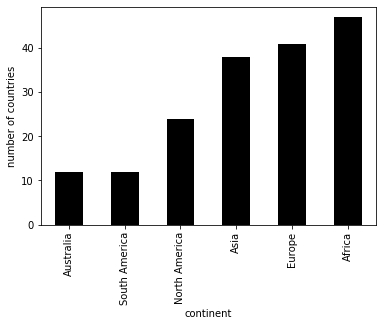

In [33]:
#Q22: How many countries are in each continent? (answer with a plot)
num_countries.plot.bar(x = 'continent', y = 'number of countries', legend = None, color = 'black').set_ylabel('number of countries')

In [34]:
#Q23: What is the total population of each continent?
total_population = pd.read_sql("select continent, sum(population)/1000000.0 as [total population (million)] from countries group by continent order by [total population (million)] desc", conn)
total_population

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0, 0.5, 'total population (million)')

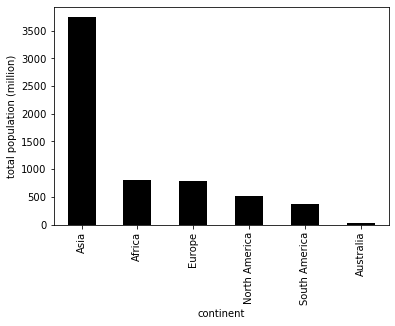

In [35]:
#Q24: What is the total population of each continent? (answer with a plot)
total_population.plot.bar(color = 'black', x = 'continent', y = 'total population (million)', legend = None).set_ylabel('total population (million)')

In [36]:
#Q25: What is the population of each country in South America?
pd.read_sql("select country, population from countries where continent = 'South America' group by country order by population desc", conn)

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [37]:
#Q26: What are the top 10 countries that have the largest real GDP?
top_ten = pd.read_sql("select country, (population*[gdp-per-capita])/1000000000.0 as [real GDP (billion)] from countries group by country order by [real GDP (billion)] desc limit 10", conn)
top_ten

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


Text(0, 0.5, 'GDP (billion)')

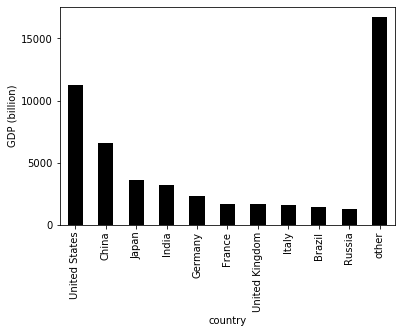

In [38]:
#Q27: What are the top 10 countries that have the largest real GDP? (answer with a plot)
all_entries = pd.read_sql("select country, (population*[gdp-per-capita])/1000000000.0 as [real GDP (billion)] from countries group by country order by [real GDP (billion)] desc", conn)
sum_val = all_entries[10:]['real GDP (billion)'].sum()
all_entries = all_entries[:10]
all_entry_dict = all_entries.to_dict()
all_entry_dict['country'][10] = 'other'
all_entry_dict['real GDP (billion)'][10] = sum_val
pd.DataFrame(all_entry_dict).plot.bar(color = 'black', x = 'country', y = 'real GDP (billion)', yticks = [0, 5000, 10000, 15000], legend = None).set_ylabel('GDP (billion)')

In [39]:
#Q28: What are the top 15 countries that have the largest gap between birth rate and death rate?
top_fifteen = pd.read_sql("select country, [birth-rate], [death-rate] from countries group by country order by [birth-rate] - [death-rate] desc limit 15", conn)
top_fifteen

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5, 0, 'rate')

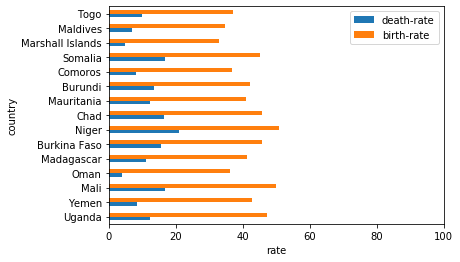

In [40]:
#Q29: What are the top 15 countries that have the largest gap between birth rate and death rate? (answer with a plot)
top_fif = pd.read_sql("select country, [death-rate],[birth-rate] from countries group by country order by [birth-rate] - [death-rate] desc limit 15", conn)
gaps = top_fif.set_index('country')
t = gaps.plot.barh(xlim = (0,100)).set_xlabel('rate')
t

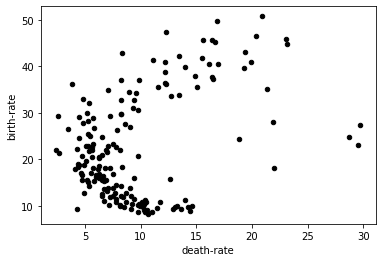

In [41]:
#Q30: What is the relationship between death rates and birth rates? (answer with a plot)
countries.plot.scatter(x = 'death-rate', y = 'birth-rate', xticks = [5, 10, 15, 20, 25, 30], yticks = [10, 20, 30, 40, 50], color = 'black')

In [42]:
#Q31: Did you notice the six outliers? Which countries are they?
pd.read_sql("select country, [death-rate], [birth-rate] from countries where [death-rate] > 18 and [birth-rate] < 30 group by country order by [death-rate] asc limit 6", conn)

,country,death-rate,birth-rate
0,Namibia,18.86,24.32
1,Zimbabwe,21.84,28.01
2,South Africa,22.00,18.20
3,Lesotho,28.71,24.75
4,Botswana,29.50,23.08
5,Swaziland,29.74,27.41


In [43]:
#Q32: What is the correlation between death rates and birth rates?
P = countries.corr()
P['death-rate']['birth-rate']

0.3965086117752512

In [44]:
pd.read_sql("""
select country, [phones] from countries
GROUP by country""", conn)

,country,phones
0,Afghanistan,3.2
1,Albania,71.2
2,Algeria,78.1
3,Anguilla,460.0
4,Argentina,220.4
...,...,...
169,Venezuela,140.1
170,Vietnam,187.7
171,Yemen,37.2
172,Zambia,8.2


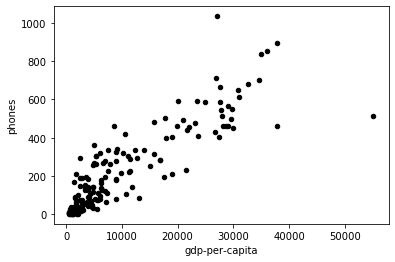

In [45]:
#Q33: What is the relationship between GDP per capita and the number of phones per capita?
#--------------------------------------------
countries.plot.scatter(x = 'gdp-per-capita', y = 'phones', color = 'black', yticks = [0, 200, 400, 600, 800, 1000])

In [46]:
#Q34: Question 34: What is the correlation between GDP per capita and number of phones per capita?
Q = countries.corr()
Q['gdp-per-capita']['phones']

0.8786946640591311

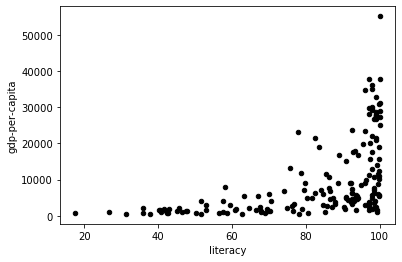

In [47]:
#Q35: What is the relationship between literacy and GDP per capita?
#-----------------------------
countries.plot.scatter(x = 'literacy', y = 'gdp-per-capita', color = 'black', xticks = [20, 40, 60, 80, 100], yticks = [0, 10000, 20000, 30000, 40000, 50000])

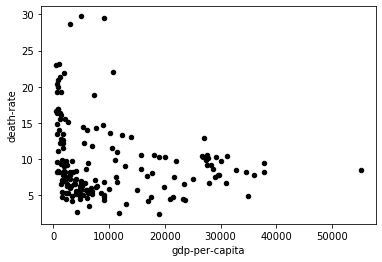

In [48]:
#Q36: What is the relationship between GDP per capita and death rates?
countries.plot.scatter(x = 'gdp-per-capita', y = 'death-rate', color = 'black', xticks = [0, 10000, 20000, 30000, 40000, 50000], yticks = [5, 10, 15, 20, 25, 30])

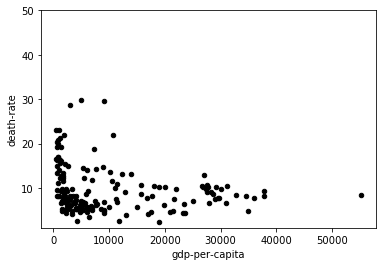

In [49]:
#Q37: What is the relationship between GDP per capita and birth rates?
countries.plot.scatter(x = 'gdp-per-capita', y = 'death-rate', color = 'black', xticks = [0, 10000, 20000, 30000, 40000, 50000], yticks = [10, 20, 30, 40, 50])

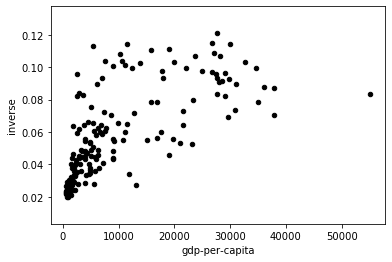

In [50]:
#Q38: What is the relationship between GDP per capita and the inverse of birth rates?
countries['inverse'] = 1 / countries['birth-rate']
countries.plot.scatter(x = 'gdp-per-capita', y = 'inverse', color = 'black', xticks = [0, 10000, 20000, 30000, 40000, 50000], yticks = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12])

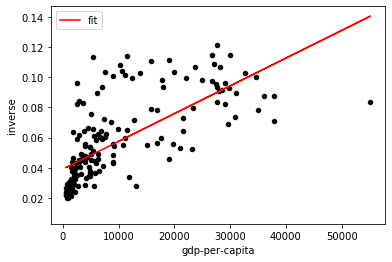

In [51]:


df = DataFrame({
    "gdp-per-capita": [1,2,3,4],
    "inverse": [2,5,6,5]
})
countries["1"] = 1

res = np.linalg.lstsq(countries[["gdp-per-capita", "1"]], countries["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
#ax = df.plot.scatter(x='gdp-per-capita', y='inverse')
ax = countries.plot.scatter(x = 'gdp-per-capita', y = 'inverse', color = 'black', xticks = [0, 10000, 20000, 30000, 40000, 50000], yticks = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14])
countries["fit"] = countries["gdp-per-capita"] * m + n
countries.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [52]:
#Q39: fit a y = m * x + n line to the scatter plot in question 38 using the least-squares method; what are the coefficients m and n?
#(slope,intercept)
(m, n)

(1.8365703926233426e-06, 0.03916624252079353)

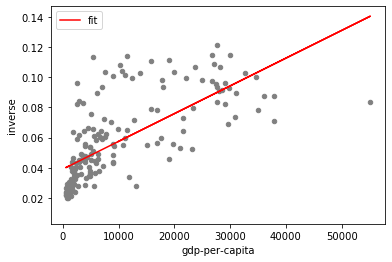

In [53]:
#Q40: plot the regression line to the scatter plot
ax = countries.plot.scatter(x = 'gdp-per-capita', y = 'inverse', color = 'gray', xticks = [0, 10000, 20000, 30000, 40000, 50000], yticks = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14])
countries["fit"] = countries["gdp-per-capita"] * m + n
countries.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)


In [54]:
conn.close()